# Fase 2: Visualización

- Usando las herramientas de visualización que has aprendido durante este módulo, contesta a las siguientes preguntas usando la mejor gráfica que consideres:

    * 1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

    * 2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

    * 3. ¿Cuál es la distribución de los clientes por provincia o estado?

    * 4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

    * 5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

    * 6. ¿Cómo se distribuyen los clientes según su estado civil y género?

# Importamos las librerías que necesitamos:

In [11]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [20]:
# Cargamos los datos generados en la Fase 1

df_flight_activity_sin_duplicados = pd.read_csv("Customer_Flight_Activity_Sin_Duplicados", index_col=0)
df_loyalty = pd.read_csv("Customer_Loyalty_History_nonull.csv", index_col=0)
df_combinado = pd.read_csv("df_combinado.csv", index_col=0)

In [21]:
# Verificamos que se han subido correctamente

df_flight_activity_sin_duplicados.head()

,año,mes,vuelos_reservados,vuelos_con_acompañantes,vuelos_totales,distancia,puntos_acumulados,puntos_canjeados,costo_en_dolares_de_puntos_canjeados
numero_fidelizacion,,,,,,,,,
100018,2017,1,3,0,3,1521,152.0,0,0
100102,2017,1,10,4,14,2030,203.0,0,0
100140,2017,1,6,0,6,1200,120.0,0,0
100214,2017,1,0,0,0,0,0.0,0,0
100272,2017,1,0,0,0,0,0.0,0,0


In [22]:
df_loyalty.head()

,numero_fidelizacion,provincia,ciudad,codigo_postal,genero,educacion,salario,estado_civil,tarjeta_lealtad,valoracion_cliente,tipo_inscripcion,año_inscripcion,mes_inscripcion,año_cancelacion,mes_cancelacion
0,480934,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,0.0,0.0
1,549612,Alberta,Edmonton,T3G 6Y6,Male,College,73455.0,Divorced,Star,3839.61,Standard,2016,3,0.0,0.0
2,429460,British Columbia,Vancouver,V6E 3D9,Male,College,73455.0,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Ontario,Toronto,P1W 1K4,Male,College,73455.0,Single,Star,3839.75,Standard,2013,2,0.0,0.0
4,530508,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,0.0,0.0


In [23]:
df_combinado.head()

,año,mes,vuelos_reservados,vuelos_con_acompañantes,vuelos_totales,distancia,puntos_acumulados,puntos_canjeados,costo_en_dolares_de_puntos_canjeados,provincia,ciudad,codigo_postal,genero,educacion,salario,estado_civil,tarjeta_lealtad,valoracion_cliente,tipo_inscripcion,año_inscripcion,mes_inscripcion,año_cancelacion,mes_cancelacion
numero_fidelizacion,,,,,,,,,,,,,,,,,,,,,,,
100018,2017,1,3,0,3,1521,152.0,0,0,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,0,0
100102,2017,1,10,4,14,2030,203.0,0,0,Ontario,Toronto,M1R 4K3,Male,College,73455.0,Single,Nova,2887.74,Standard,2013,3,0,0
100140,2017,1,6,0,6,1200,120.0,0,0,British Columbia,Dawson Creek,U5I 4F1,Female,College,73455.0,Divorced,Nova,2838.07,Standard,2016,7,0,0
100214,2017,1,0,0,0,0,0.0,0,0,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,0,0
100272,2017,1,0,0,0,0,0.0,0,0,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,0,0


1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

In [29]:
# Agrupamos por 'Año' y 'Mes' y sumamos la cantidad de vuelos reservados

Vuelos_mensuales = df_flight_activity_sin_duplicados.groupby(['año', 'mes'])['vuelos_reservados'].sum().reset_index()
Vuelos_mensuales

,año,mes,vuelos_reservados
0,2017,1,47766
1,2017,2,47691
2,2017,3,64271
3,2017,4,55720
4,2017,5,65279
5,2017,6,80493
6,2017,7,89288
7,2017,8,78692
8,2017,9,63304
9,2017,10,60351


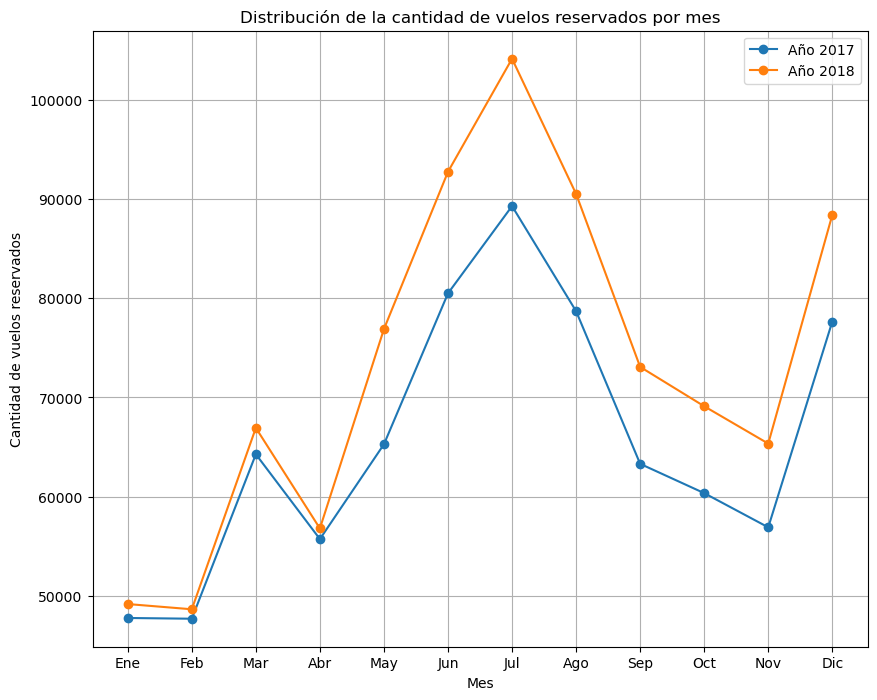

In [31]:
# Generamos la gráfica con la cantidad de vuelos reservados por mes durante el año

plt.figure(figsize=(10, 8))
for year in Vuelos_mensuales['año'].unique():
    subset = Vuelos_mensuales[Vuelos_mensuales['año'] == year]
    plt.plot(subset['mes'], subset['vuelos_reservados'], marker='o', label=f'Año {year}')

plt.title('Distribución de la cantidad de vuelos reservados por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de vuelos reservados')
plt.xticks(ticks=list(range(1, 13)), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.legend()
plt.grid(True)
plt.show()

- El gráfico presentado muestra la evolución de la cantidad de vuelos reservados a lo largo de dos años consecutivos, 2017 y 2018. 

- Ambas líneas presentan un patrón similar, con un aumento significativo en los meses de verano (junio, julio y agosto) y una disminución en los meses de invierno (enero, febrero). Esto sugiere una estacionalidad en la demanda de vuelos, con mayor actividad durante los meses de vacaciones de verano. 



2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

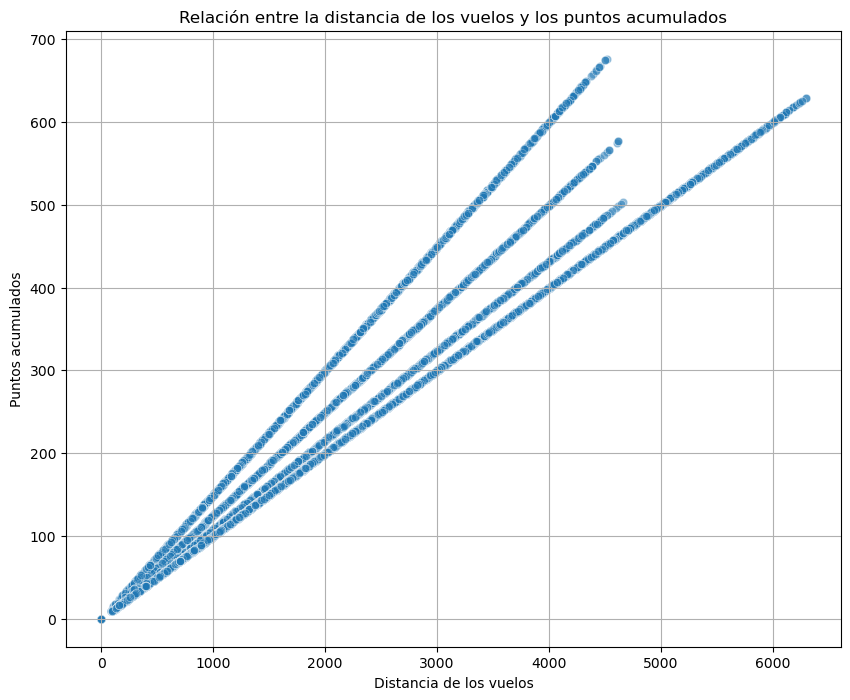

In [35]:
# Configuramos el tamaño de la figura
plt.figure(figsize=(10, 8))

# Creamos el scatterplot
sns.scatterplot(x='distancia', y='puntos_acumulados', data=df_flight_activity_sin_duplicados, alpha=0.5)

# Añadimos el título:
plt.title('Relación entre la distancia de los vuelos y los puntos acumulados')

#Añadimos las etiquetas; "xlabel para nombre del eje x - ylabel para nombre del eje y"
plt.xlabel('Distancia de los vuelos')
plt.ylabel('Puntos acumulados')

# Mostramos la gráfica
plt.grid(True)
plt.show()

- En la gráfica podemos demostrar que a mayor distancia de vuelo, mayor cantidad de puntos se acumulan. Por lo tanto, sí existe una relación entre los factores distancia de los vuelos y puntos acumulados.

3. ¿Cuál es la distribución de los clientes por provincia o estado?

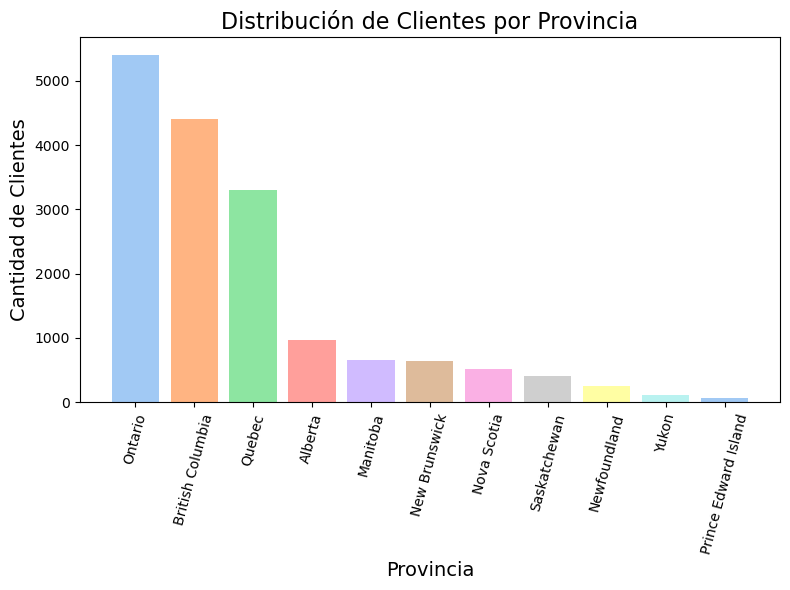

In [75]:
# Contar la cantidad de clientes por provincia
provincia_counts = df_loyalty['provincia'].value_counts()

# Configuración de tamaño de la figura
plt.figure(figsize=(8, 6))

colores = sns.color_palette("pastel")

# Creamos un gráfico de barras
plt.bar(provincia_counts.index, provincia_counts.values, color=colores)

# Rotamos, en este caso, las etiquetas del eje x para mejor visualización
plt.xticks(rotation=75)

# Añadimos títulos y sus etiquetas
plt.title('Distribución de Clientes por Provincia', fontsize=16)
plt.xlabel('Provincia', fontsize=14)
plt.ylabel('Cantidad de Clientes', fontsize=14)

# Mostramos el gráfico
plt.tight_layout()   # Evitamos solapamiento
plt.show()


- Basado en la gráfica proporcionada, Ontario es la provincia con mayor cantidad de clientes, superando significativamente a las demás.

- A medida que se avanza hacia el final de la lista, se observa una disminución constante en la cantidad de clientes por provincia.

- Suponemos, gracias a la gráfica, que las provincias con mayor población (como Ontario y Quebec) tienden a tener una mayor base de clientes; probablemente debido a su densidad poblacional. 

4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

,educacion,salario
0,Bachelor,72599.080913
1,College,73455.000000
2,Doctor,178403.675202
3,High School or Below,61146.378165
4,Master,103734.523724


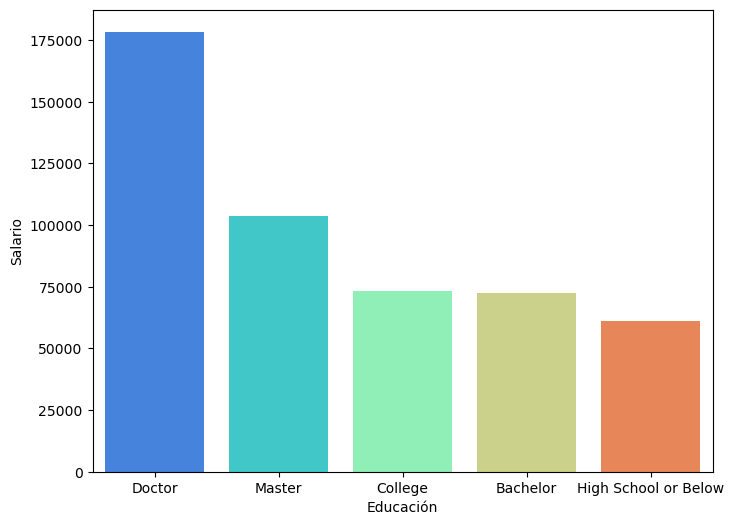

In [77]:
# Agrupamos los datos por nivel educativo y calculamos el promedio de salario
salario_promedio_educacion = df_combinado.groupby('educacion')['salario'].mean().reset_index()
display(salario_promedio_educacion)

# Ordenamos el DataFrame por el salario promedio de forma descendente
salario_promedio_educacion = salario_promedio_educacion.sort_values(by='salario', ascending=False)

# Configuramos el tamaño de nuestra figura 
plt.figure(figsize=(8, 6))

sns.barplot(x = "educacion", y = "salario", data = salario_promedio_educacion, palette = "rainbow")
plt.ylabel("Salario")
plt.xlabel("Educación");

- Podemos observar una tendencia general en la que los individuos con un nivel educativo más alto tienden a tener salarios promedios más elevados. 
- Los doctores, por ejemplo, presentan el salario promedio más alto, seguidos de los que poseen un máster.
- Entendemos que también hay factores que influyen en el salario, como puede ser la experiencia laboral, la industria, la empresa, la ubicación geográfica, etc; pero en este caso específico, A MAYOR NIVEL EDUCATIVO MEJOR SALARIO.

5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

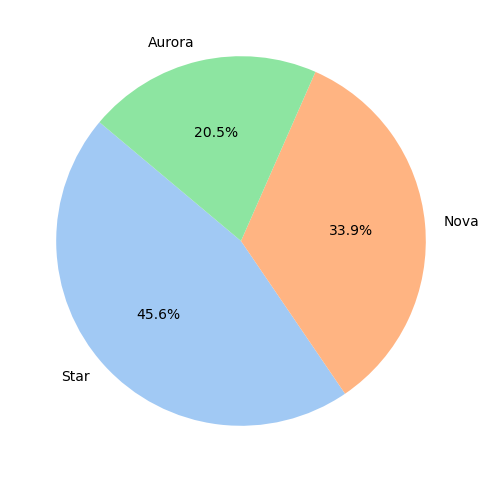

In [69]:
# Contamos el número de clientes para cada tipo de tarjeta de fidelidad
df_tarjeta = df_loyalty['tarjeta_lealtad'].value_counts()

# Definimos una lista de colores con 7 elementos 
colores = sns.color_palette("pastel", 7)

# Configuración del tamaño de la figura 
plt.figure(figsize=(8, 6))

plt.pie(df_tarjeta, labels = df_tarjeta.index, autopct = '%1.1f%%', startangle=140, colors = colores)

# Mostramos el gráfico
plt.show()

- La tarjeta Star es la más popular entre los clientes, seguida de Nova y Aurora; siendo prácticamente el 50% de los clientes quienes tienen esta tarjeta.
- Existe una diferencia significativa en la proporción de clientes entre las tres categorías.

6. ¿Cómo se distribuyen los clientes según su estado civil y género?

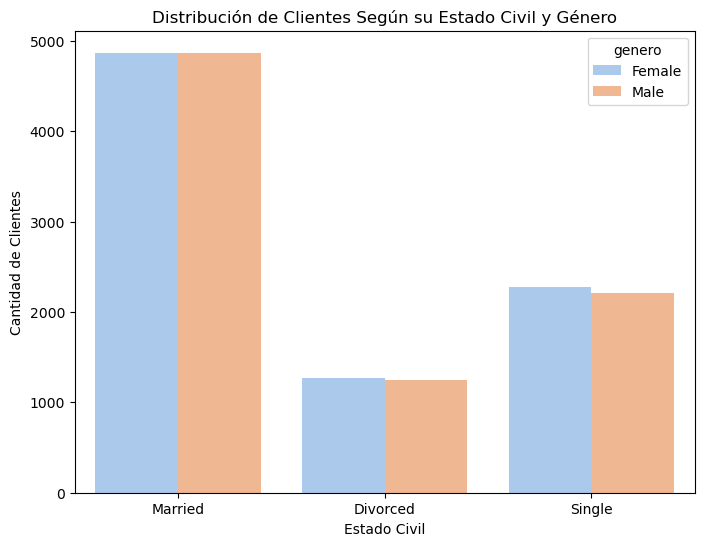

In [71]:
# Configuramos el tamaño de la figura
plt.figure(figsize=(8, 6))

# Creamos el gráfico countplot
sns.countplot(data = df_loyalty, x = 'estado_civil', hue = 'genero', palette = "pastel")

# Añadimos títulos y etiquetas
plt.title('Distribución de Clientes Según su Estado Civil y Género')
plt.xlabel('Estado Civil')
plt.ylabel('Cantidad de Clientes')

# Mostramos nuestro gráfico
plt.show()

- Tanto para hombres como para mujeres, el estado civil "casado" presenta la mayor cantidad de clientes. Esto sugiere que las personas casadas son un segmento importante de la base de clientes.
- La distribución de clientes por género es relativamente similar entre los diferentes estados civiles.